# L1: NLP tasks with a simple interface 🗞️

The first lesson, we're going to build two natural language processing apps, an app for text summarization and an app for named entity recognition, using the Gradle user interface. 

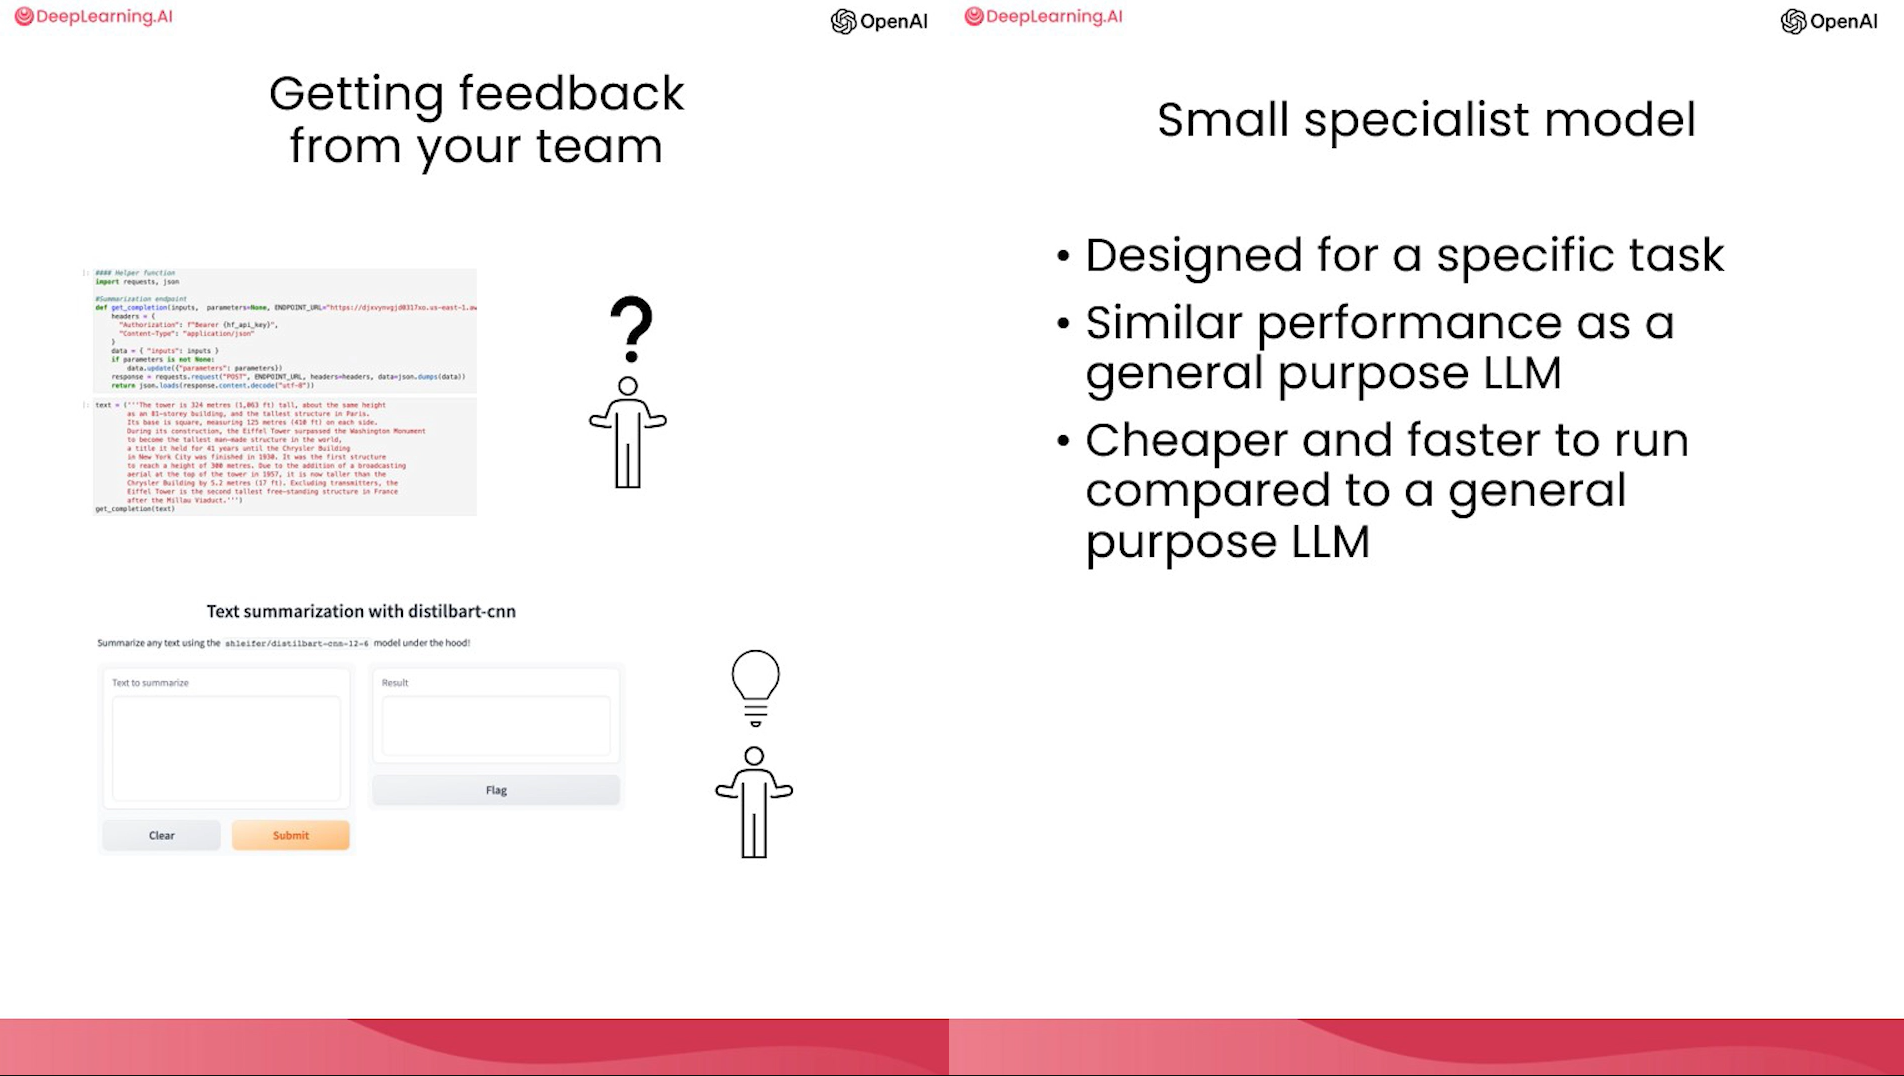

To get feedback from your team or community, it can be very helpful to give them a user interface that doesn't require them to run any code. Gradio lets you build that user interface quickly and without writing much code. When you have a specific task in mind, such as summarizing text, a small specialist model that is designed for that specific task can perform just as well as a General Purpose Large Language model.  A smaller specialist model can also be cheaper and faster to run. 

Here, you're going to build an app that can perform two NLP tasks, summarizing text and name identity recognition, using two specialist models that are designed for each of these two tasks. 

Load your HF API key and relevant Python libraries.

In [ ]:
import os
import io
from IPython.display import Image, display, HTML
from PIL import Image
import base64
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [ ]:
# Helper function
import requests, json

#Summarization endpoint
def get_completion(inputs, parameters=None,ENDPOINT_URL=os.environ['HF_API_SUMMARY_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL, headers=headers,
                                data=json.dumps(data)
                               )
    return json.loads(response.content.decode("utf-8"))

## Building a text summarization app

Here we are using an [Inference Endpoint](https://huggingface.co/inference-endpoints) for the `shleifer/distilbart-cnn-12-6`, a 306M parameter distilled model from `facebook/bart-large-cnn`. 

### How about running it locally?
The code would look very similar if you were running it locally instead of from an API. The same is true for all the models in the rest of the course, make sure to check the [Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) documentation page

```py
from transformers import pipeline

get_completion = pipeline("summarization", model="shleifer/distilbart-cnn-12-6")

def summarize(input):
    output = get_completion(input)
    return output[0]['summary_text']
    
```

So first of all, we're going to set up our API key, and then we're going to set up our helper function with the summarization endpoint. Here, we have an endpoint for the inference endpoint API that is going to work with the API key that is set on the course, and this API is essentially calling a function that if you were to run it locally, it would look something like this. So, we're importing the pipeline function from the Hugging Face Transformers Library. 

We're choosing the model Distill Bart CNN for the text summarization because it is one of the state-of-the-art models for text summarization. In fact, if we use the Transformers Pipeline Function for the text summarization without specifying the model explicitly, it will default to Distill BART CNN. Since this model is built specifically for summarization, for any text that you feed into the model, it will output a summary of it. Since the speed and cost are important for any application, a specialist model, as opposed to a General Purpose Large Language Model, can be both cheaper to run and provide a faster response to the user. 

Another way to improve cost and speed is to create a smaller version of the model that has a very similar performance. This is a process called **DISTILLATION**.

Distillation uses the predictions of a large model to train a smaller model. So, the model we're using, Distil Bart CNN, is actually a distilled model based on the larger model, trained by Facebook, called Bart Large CNN. For this course, we're running these models on a server and accessing them through API calls. If you were running the model locally on your own machine, this is the code you would use. But since we're not running the models directly in this classroom, I'll delete this code. 

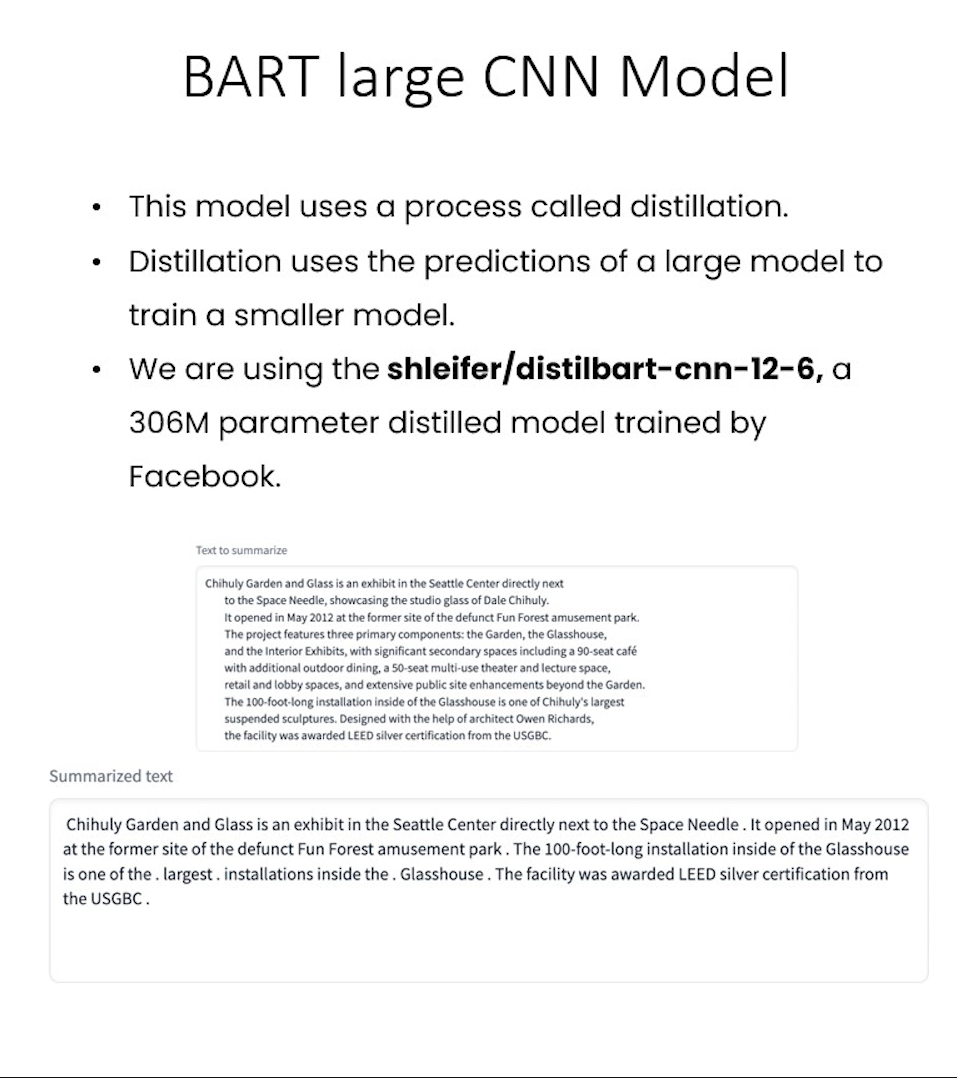

In [ ]:
text = ('''The tower is 324 metres (1,063 ft) tall, about the same height
        as an 81-storey building, and the tallest structure in Paris. 
        Its base is square, measuring 125 metres (410 ft) on each side. 
        During its construction, the Eiffel Tower surpassed the Washington 
        Monument to become the tallest man-made structure in the world,
        a title it held for 41 years until the Chrysler Building
        in New York City was finished in 1930. It was the first structure 
        to reach a height of 300 metres. Due to the addition of a broadcasting 
        aerial at the top of the tower in 1957, it is now taller than the 
        Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the 
        Eiffel Tower is the second tallest free-standing structure in France 
        after the Millau Viaduct.''')

get_completion(text)

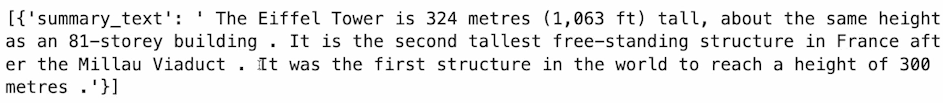

But if you wanted people on your team or a beta testing community to try out your model, maybe giving them this code to run isn't the best user experience, especially if your users aren't familiar with coding. Or maybe, as you'll see later, your model has some options that would make it hard to try out even if your users are coders.  That's why Gradio can help. 

### Getting started with Gradio `gr.Interface` 

#### How about running it locally?
The code would look very similar if you were running it locally.  Simply remove all the paramters in the launch method

```py
demo.launch()
```

In [ ]:
import gradio as gr
def summarize(input):
    output = get_completion(input)
    return output[0]['summary_text']
    
gr.close_all()
demo = gr.Interface(fn=summarize, inputs="text", outputs="text")
demo.launch(share=True, server_port=int(os.environ['PORT1']))

So, let's start by importing Gradio as gr. Next, we'll define a function called summarize. It takes an input string, calls the Get-Completion function that we defined earlier, and returns the summary. Next, we'll use the Gradio interface function. Pass in the name of the function summarize, which we just defined, set the inputs to text and outputs also to text. Then, call demo launch to create the user interface. So, let's see how this looks like. Cool! We have our first demo.

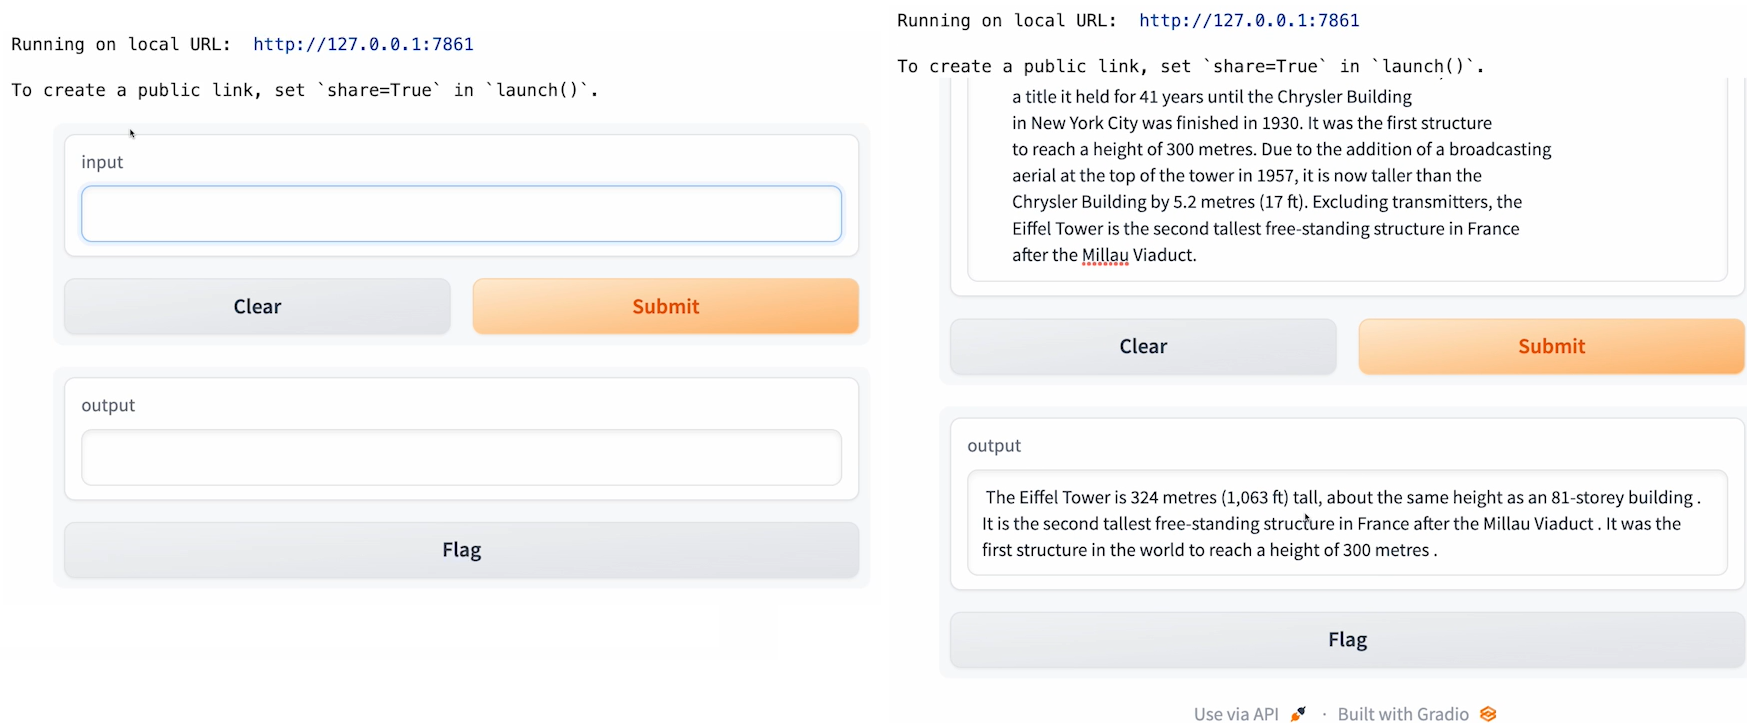

You can add `demo.launch(share=True)` to create a public link to share with your team or friends.

In [ ]:
import gradio as gr

def summarize(input):
    output = get_completion(input)
    return output[0]['summary_text']

gr.close_all()

demo = gr.Interface(fn=summarize, 
                    inputs=[gr.Textbox(label="Text to summarize", lines=6)],
                    outputs=[gr.Textbox(label="Result", lines=3)],
                    title="Text summarization with distilbart-cnn",
                    description="Summarize any text using the `shleifer/distilbart-cnn-12-6` model under the hood!"
                   )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

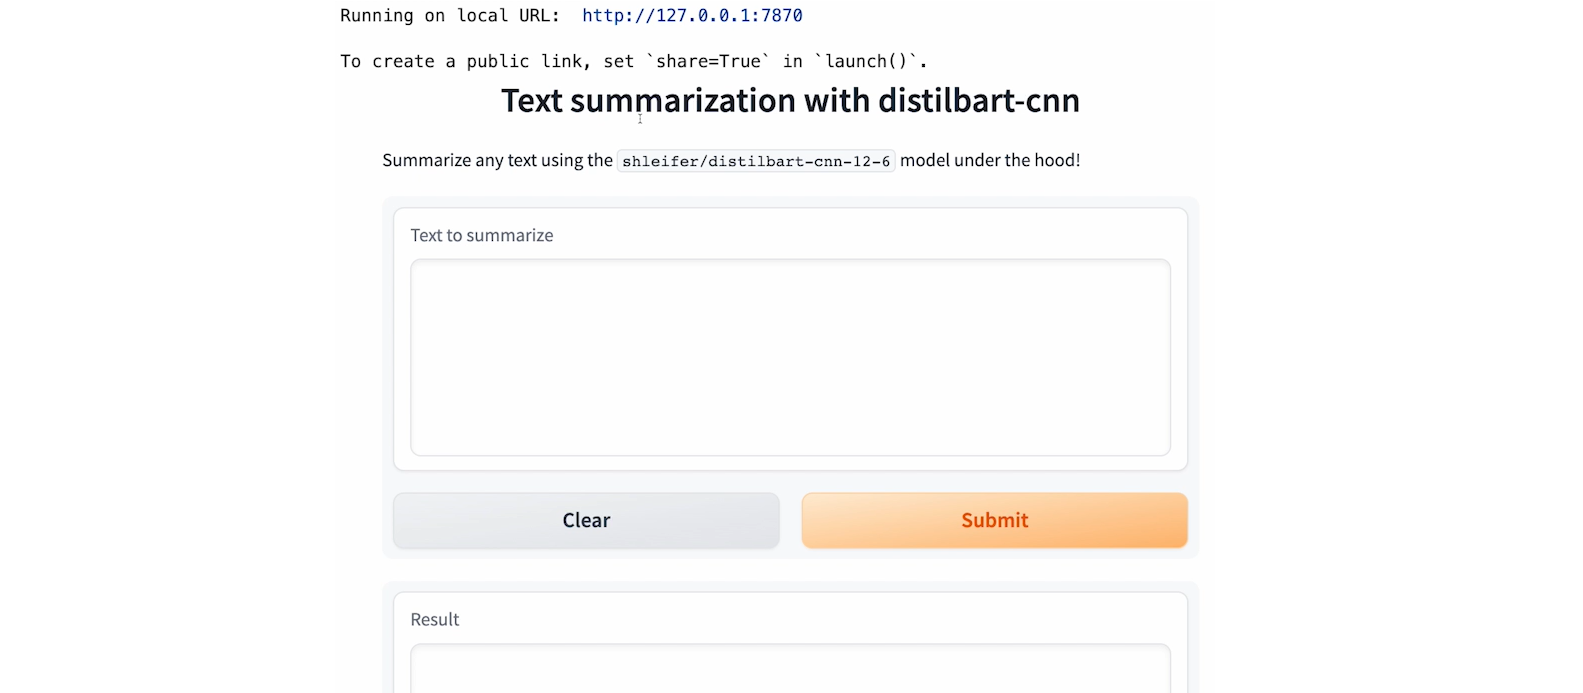

We can go ahead and try to customize the user interface. For example, right now it just says Input and Output. We can customize these labels if we replace the Input and Output with the Gradio Component Textbox. The GR Textbox lets us put some labels on it. So, we can label the Input as Text to Summarize, and let's label the Output as Result. Let's see how this looks. 

Okay, so we have a pretty nice app right here, but maybe you want to make it obvious that people can paste long paragraphs of text. Right now, if a user sees a text box like this, they may think that the model can only take in one line of text. We can make this text box into a taller text field that can take in many lines of text. To do that, we'll use the lines parameter. If you set lines equals six, notice that the text field here is now a bit taller. And we can also set the lines parameter of the summary to say three, and this is what we'll get. We can also add a title for this application. So, let's call this text summarization with the Distill Bart CNN. And we can add a description of what the app does. 

Right now, we're displaying this apps locally within the Jupyter Notebook. But, if you're trying this in your own machine and you wanna share this app with a friend through the internet, you can actually create a web link that your friend or colleague can use to view your app in their web browser. To do this, update demo launch with share equals true. It outputs running on public URL followed by a web link. If you share this link with anyone, they'll see your app in their web browser and be able to test out your model that you're running in your own machine.  

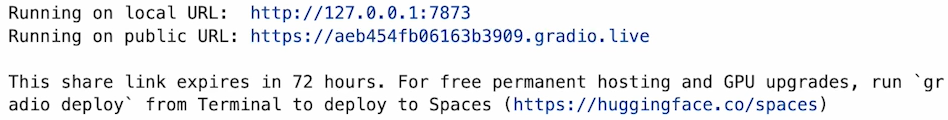

## Building a Named Entity Recognition app

Next, we'll build an app that performs name density recognition. By that, I mean the model would take a text and label certain words as persons, institutions or places. We'll be using a BERT Based Name Density Recognition Model. 

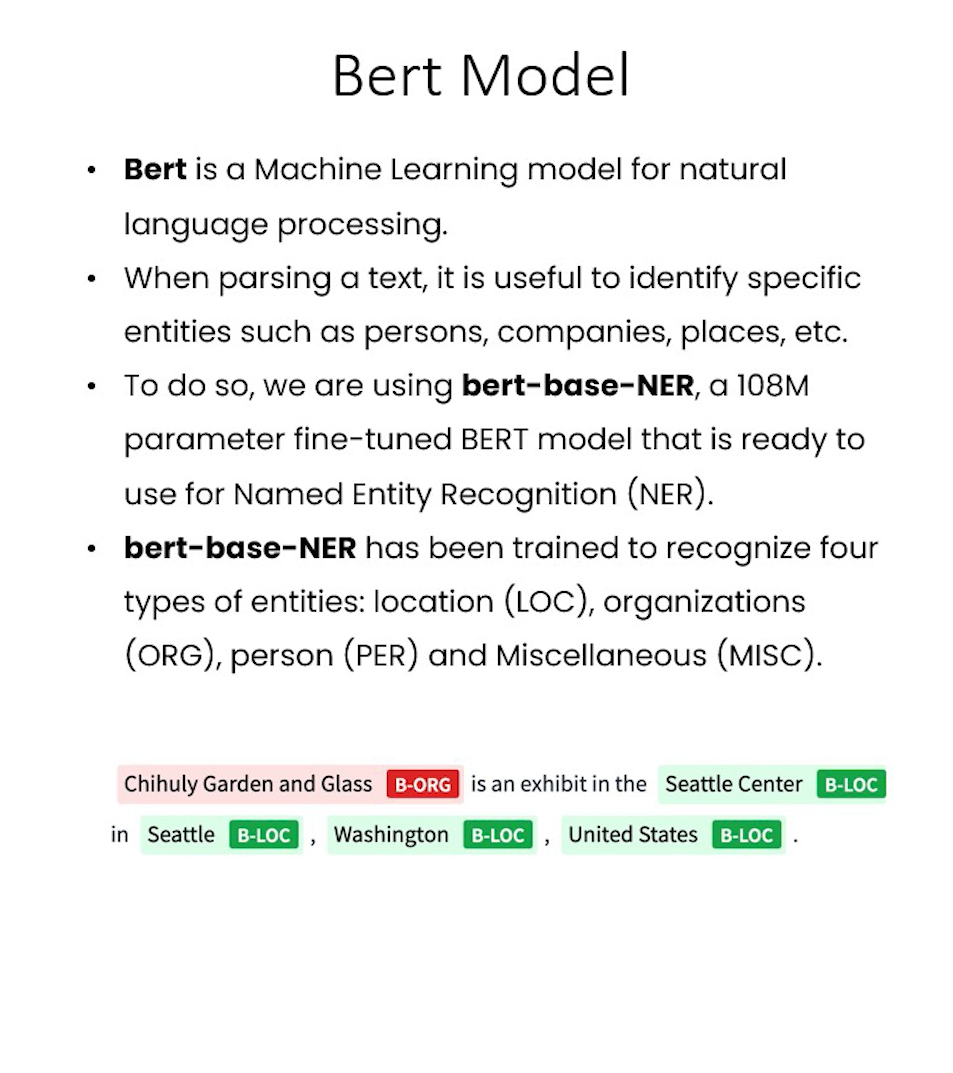

BERT is a General-Purpose Language Model that can perform many NLP tasks, but the one we're using has been specifically fine-tuned to have a state-of-the-art performance on named entity recognition tasks. It recognizes four types of entities, location, organizations, persons, and miscellaneous. An open-source model such as this can also be fine-tuned to recognize specific entities for your specific use case. 

We are using this [Inference Endpoint](https://huggingface.co/inference-endpoints) for `dslim/bert-base-NER`, a 108M parameter fine-tuned BART model on the NER task.

### How about running it locally?

```py
from transformers import pipeline

get_completion = pipeline("ner", model="dslim/bert-base-NER")

def ner(input):
    output = get_completion(input)
    return {"text": input, "entities": output}
    
```

As with all of the models in this course, we're running these models on a server, accessing them with an API endpoint.  

In [ ]:
API_URL = os.environ['HF_API_NER_BASE'] #NER endpoint
text = "My name is Andrew, I'm building DeepLearningAI and I live in California"
get_completion(text, parameters=None, ENDPOINT_URL= API_URL)

So here, we have the API endpoint, and here's the input text. Now, let's call the Get-Completion Function, parameters equals none, and set the endpoint URL. 

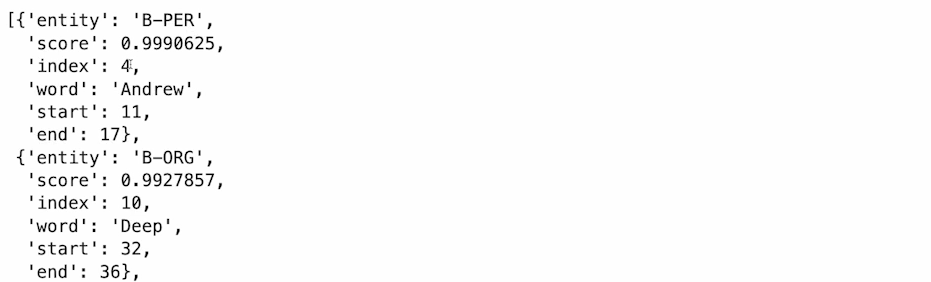

So, when I run this, it outputs a list of dictionaries, where each dictionary has an information of an entity. For example, it identified Andrew as a person. This raw output can be useful for downstream software applications, but what if you wanted to make this output more user-friendly for a human? You can make the output more visually digestible using Gradio. 

**NER**

It calls the Get-Completion Function and returns both the original input text and the entities that are returned by the model.

So here, we are going to do a **demo** with a code that is very similar to what we did in the last section, where essentially, we have inputs with a Gradio text box. But here, outputs has a different parameter, which is highlighted text. And we'll see in a second what that means. And we have a title, a description. And we add this allow flagging equals never, because if we go back here, you can see that by default, there is a flag button here, which lets the user flag inappropriate responses. But, if your application doesn't need that, we can hide that button with this code. 

And I'm also introducing here two examples of input text for your app. So, your users can click in one of the examples to input those into the model and see an example of how your app would work. So, for a Gradle demo, we'll have our named entity recognition function where it will take as input, the Gradle input, and then it will run the Get-Completion Function like we did before, and it will return the text, which will be just like the input and the entities, which is this whole entity list that the named entity recognition model returns for us. And here, we have our Gradle demo. So, let's run it and see how it looks. 

In [ ]:
def ner(input):
    output = get_completion(input, parameters=None, ENDPOINT_URL=API_URL)
    return {"text": input, "entities": output}

gr.close_all()

demo = gr.Interface(fn=ner,
                    inputs=[gr.Textbox(label="Text to find entities", lines=2)],
                    outputs=[gr.HighlightedText(label="Text with entities")],
                    title="NER with dslim/bert-base-NER",
                    description="Find entities using the `dslim/bert-base-NER` model under the hood!",
                    allow_flagging="never",
                    #Here we introduce a new tag, examples, easy to use examples for your application
                    examples=["My name is Andrew and I live in California", "My name is Poli and work at HuggingFace"])

demo.launch(share=True, server_port=int(os.environ['PORT3']))

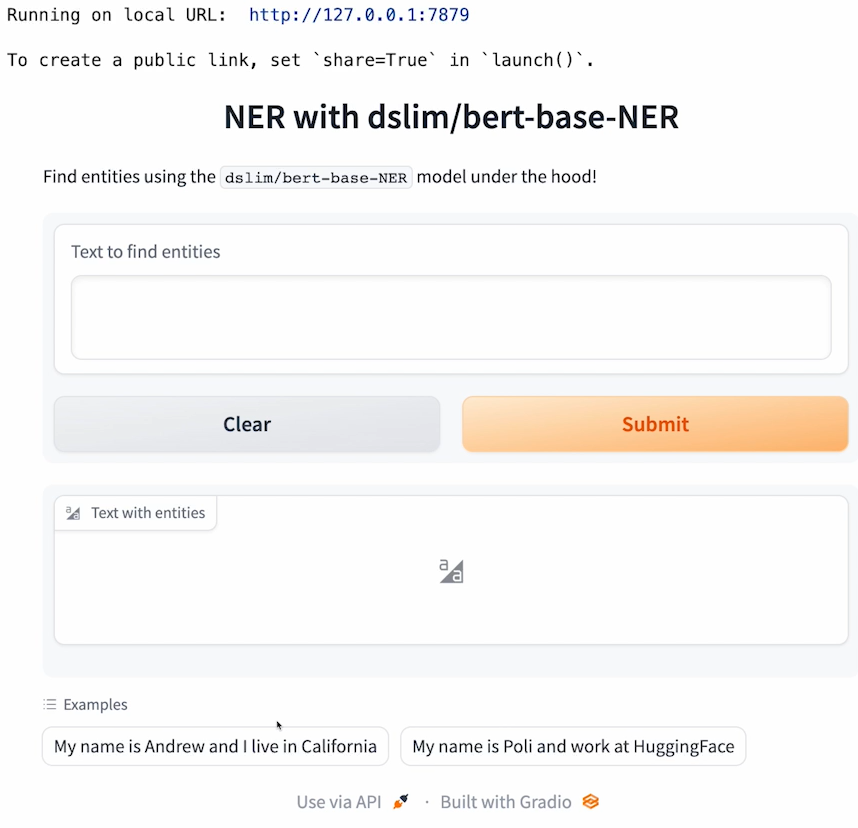

So, we can see here that it's very similar to our previous demo on text summarization. We have the Gradle textbox function like there, but here we have a new kind of output, which is the highlighted text output. 

And what the highlighted text output does is that it can accept the entity's output, which is the entities of the named entity recognition model that we showed before. And we also have the example. 

So here, we have this new area called Examples, where essentially it helps the users of your app to understand with examples how things work. So, let's use one of those examples and submit it. 

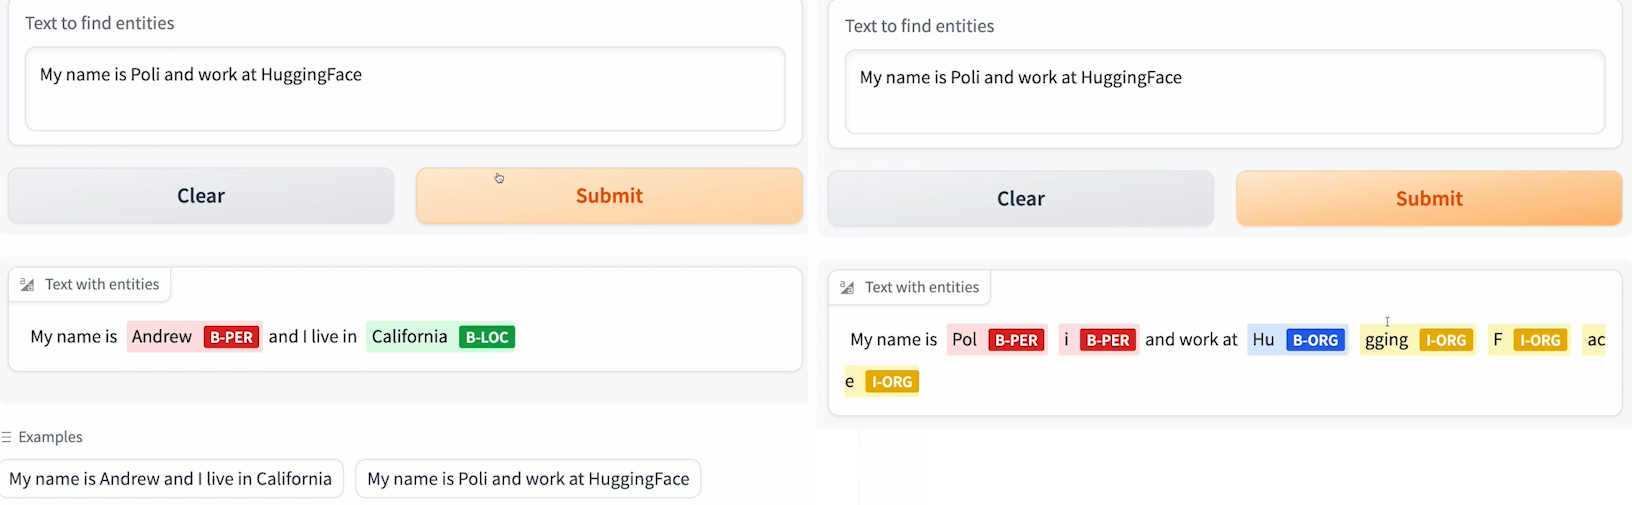

And you can see, oh, it worked pretty nicely. And now let's try this other example. So, you can see here that it worked. So here, you can see it identified Polly as a person and Hugging Face as an organization. But you can also see that it broke down the words into these chunks. So, you can see here that Polly has two chunks and Hugging Face is broken down into these chunks. 

And those chunks are called Tokens.  And tokens are short sequences of characters that commonly occur in language. So, longer words are composed of multiple tokens, and the reason why the models want to do that is for efficiency. So, you want to have the model trained with as little tokens as it can get. So instead of having one word per token, which would be very inefficient, you have groupings of characters that can vary in size depending on the model. 

And here, you can see the entity label starts with the letter B for beginning token. And here, we have this letter I, which indicates it's an intermediate token. So, the organization entity Hugging Face is identified by a beginning token and can be followed with one or more intermediate tokens. While it may sometimes be helpful to see the individual tokens, for a user-facing application, you probably want to just show the organization hugging face as a single word. 



### Adding a helper function to merge tokens


We can write a bit of code to merge these tokens. So here, what you can see is that we have our Merge-Tokens function. So, to have each token visually as one word, we can use this function Merge-Tokens here. 

So, let's run our code and see what's going on. So now, here I added some more entities. 

In [ ]:
def merge_tokens(tokens):
    merged_tokens = []
    for token in tokens:
        if merged_tokens and token['entity'].startswith('I-') and merged_tokens[-1]['entity'].endswith(token['entity'][2:]):
            # If current token continues the entity of the last one, merge them
            last_token = merged_tokens[-1]
            last_token['word'] += token['word'].replace('##', '')
            last_token['end'] = token['end']
            last_token['score'] = (last_token['score'] + token['score']) / 2
        else:
            # Otherwise, add the token to the list
            merged_tokens.append(token)

    return merged_tokens

def ner(input):
    output = get_completion(input, parameters=None, ENDPOINT_URL=API_URL)
    merged_tokens = merge_tokens(output)
    return {"text": input, "entities": merged_tokens}

gr.close_all()
demo = gr.Interface(fn=ner,
                    inputs=[gr.Textbox(label="Text to find entities", lines=2)],
                    outputs=[gr.HighlightedText(label="Text with entities")],
                    title="NER with dslim/bert-base-NER",
                    description="Find entities using the `dslim/bert-base-NER` model under the hood!",
                    allow_flagging="never",
                    examples=["My name is Andrew, I'm building DeeplearningAI and I live in California", "My name is Poli, I live in Vienna and work at HuggingFace"])

demo.launch(share=True, server_port=int(os.environ['PORT4']))

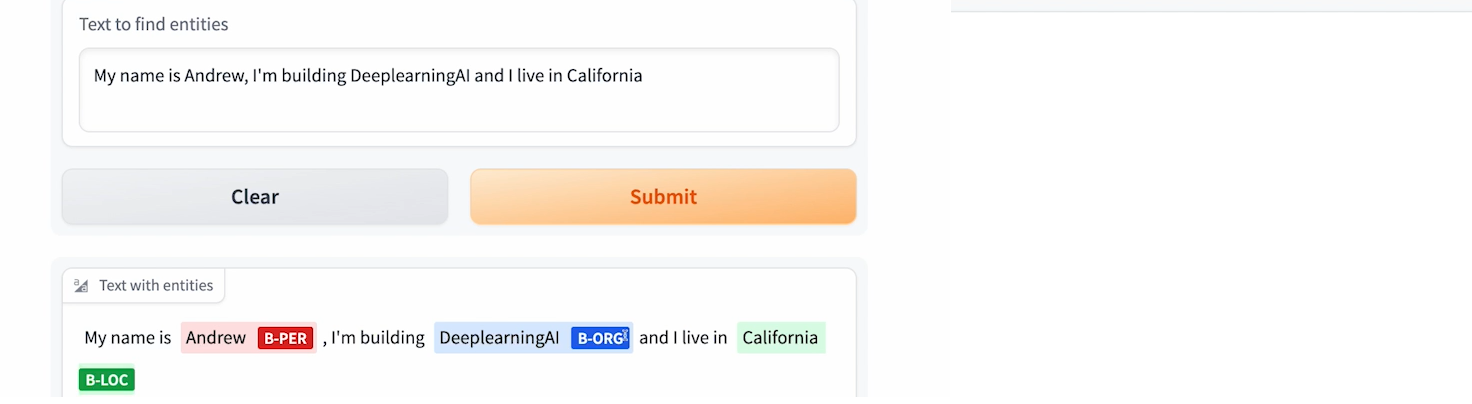

Oh, so this now joined Paul into a single word, and Vienna as a location, and Hugging Face. And also, I added a bit more context, and you can see that it also connected all these words. And how did I do this? Well, I created this Merge-Tokens function that essentially takes our tokens from last time and checks if they start with the letter I. These tokens merge with the previous token that was denoted with the letter B. There is also a small correction here that we remove. If we go back here, you can see that in the intermediate tokens, it adds these hashtag characters that we don't want to show the user. 

So, the code here is removing them and then joining the tokens into a single This code is also taking average of the score, but since the app isn't displaying the score, it can just ignore that for now. And that's it! We have our named entity recognition app.

In [ ]:
gr.close_all()

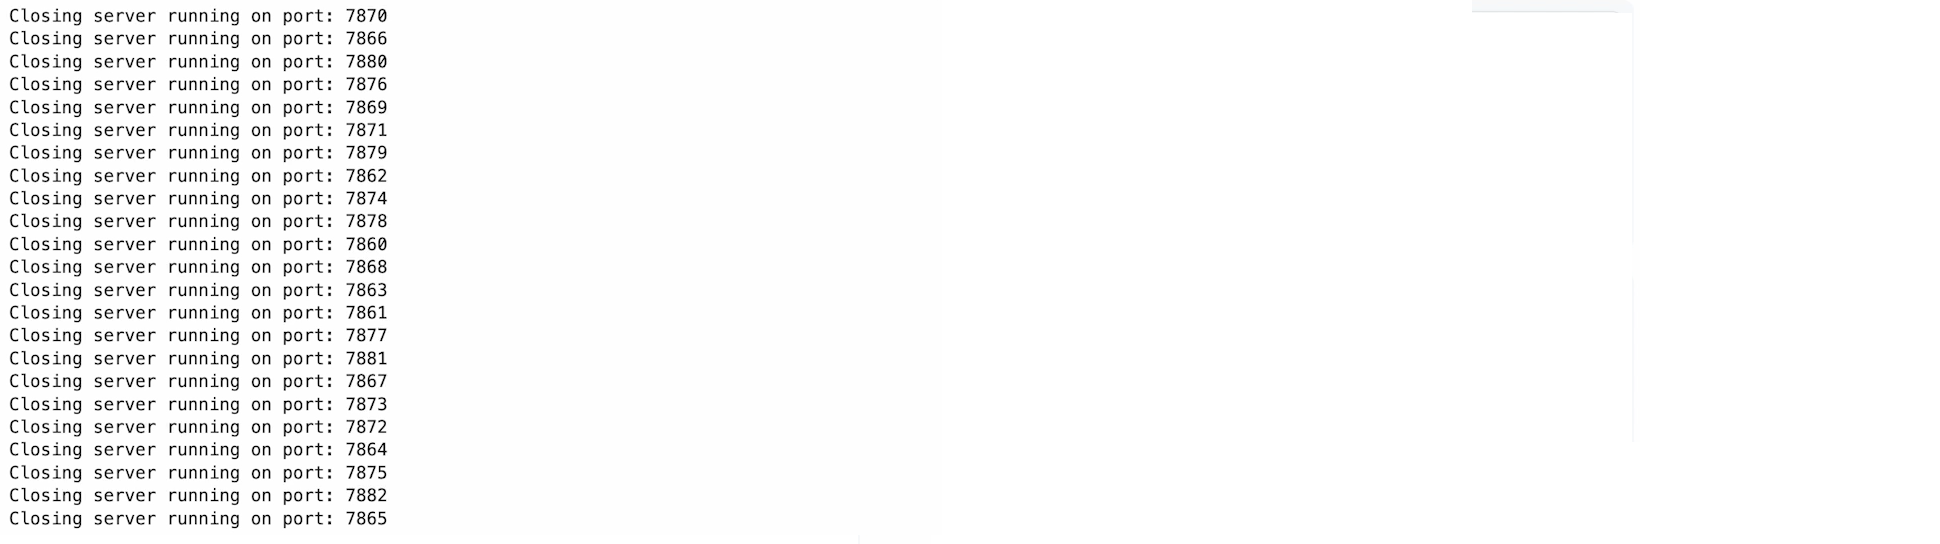

Because we open so many ports with multiple Gradle apps, you may want to clean up your ports by running Gradio
Close All function.